In [1]:
infile = "examples/example22.txt"

In [2]:
def readInput22(infile):
    with open(infile) as f:
        blocks = []
        for l in f.read().strip().splitlines():
            e = l.split("~")
            block = []
            for c0,c1 in zip(e[0].split(","),e[1].split(",")):
                block.append(range(int(c0),int(c1)+1))
            blocks.append(block)
    return blocks

In [3]:
from collections import defaultdict

def block_to_space(block,space,value=1):
    rx,ry,rz = block
    for z in rz:
        for y in ry:
            for x in rx:
                space[(x,y,z)] = value

def fill_space(blocks):
    space = defaultdict(int)
    for i,b in enumerate(blocks):
        block_to_space(b,space,i+1)
    return space

In [4]:
infile = "examples/example22.txt"
blocks = readInput22(infile)
space = fill_space(blocks)

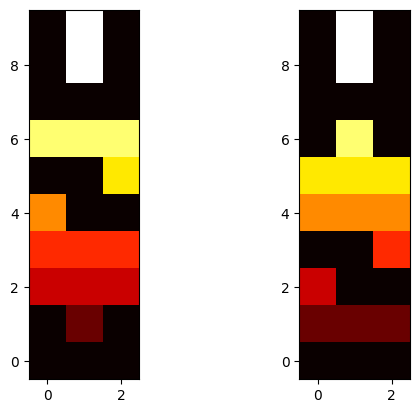

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def draw_projections(space,dims=(10,3)):
    XZ = np.zeros(dims)
    YZ = np.zeros(dims)
    for (x,y,z),v in space.items():
        if v:
            XZ[z,x] = v
            YZ[z,y] = v
    ax1 = plt.subplot(1, 2, 1)
    ax1.imshow(XZ,origin='lower',cmap="hot")
    ax2 = plt.subplot(1, 2, 2)
    ax2.imshow(YZ,origin='lower',cmap="hot")
    
draw_projections(space)

In [6]:
def drop_blocks(blocks,space,verbose=True):
    blocks_new = []
    supported_by = defaultdict(set)
    for i in range(len(blocks)):
        b = blocks[i]
        while True:
            rx,ry,rz = b
            z0 = rz.start
            z1 = rz.stop
            if z0==1:
                supported_by[i+1].add(0)
                blocks_new.append(b)
                break
            # Try to drop block
            rznew = range(z0-1,z1-1) # new Z coordinates
            canDrop = True
            z = z0-1
            for y in ry:
                for x in rx:
                    if space[(x,y,z)] and space[(x,y,z)]!=i+1: # space already occupied
                        supported_by[i+1].add(space[(x,y,z)])
            if len(supported_by[i+1]):
                blocks_new.append(b)
                break
            else:
                bnew = [rx,ry,rznew]
                block_to_space(b,space,0)
                block_to_space(bnew,space,i+1)
                b = bnew

    return blocks_new, supported_by

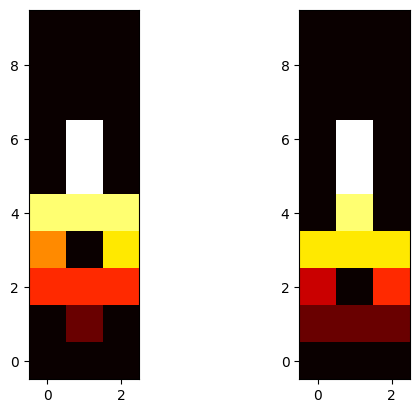

In [7]:
blocks_static, supported_by = drop_blocks(blocks,space)

draw_projections(space,dims=(10,3))

In [8]:
all_blocks = set()
support_somethings = set()
can_be_destroied = set()

for b,sups in supported_by.items():
    all_blocks.add(b)
    support_somethings.update(sups)
    if len(sups)>1:
        can_be_destroied.update(sups)

support_somethings.remove(0) # don't count the floor!
can_be_destroied.update(all_blocks - support_somethings)
can_be_destroied

{2, 3, 4, 5, 7}

In [9]:
def part1(infile):
    blocks = readInput22(infile)
    space = fill_space(blocks)
    blocks_static, supported_by = drop_blocks(blocks,space)
    
    all_blocks = set()
    support_somethings = set()
    can_be_destroied = set()

    for b,sups in supported_by.items():
        all_blocks.add(b)
        support_somethings.update(sups)
        if len(sups)>1:
            can_be_destroied.update(sups)
    support_somethings.remove(0)
    can_be_destroied.update(all_blocks - support_somethings)
    return len(can_be_destroied)

In [10]:
part1("examples/example22.txt")

5

In [11]:
part1("AOC2023inputs/input22.txt")

# 548 too high

548

In [14]:
## blocks in full input are not ordered in space! I need to order them in z before dropping them...

infile = "AOC2023inputs/input22.txt"
blocks = readInput22(infile)
space = fill_space(blocks)

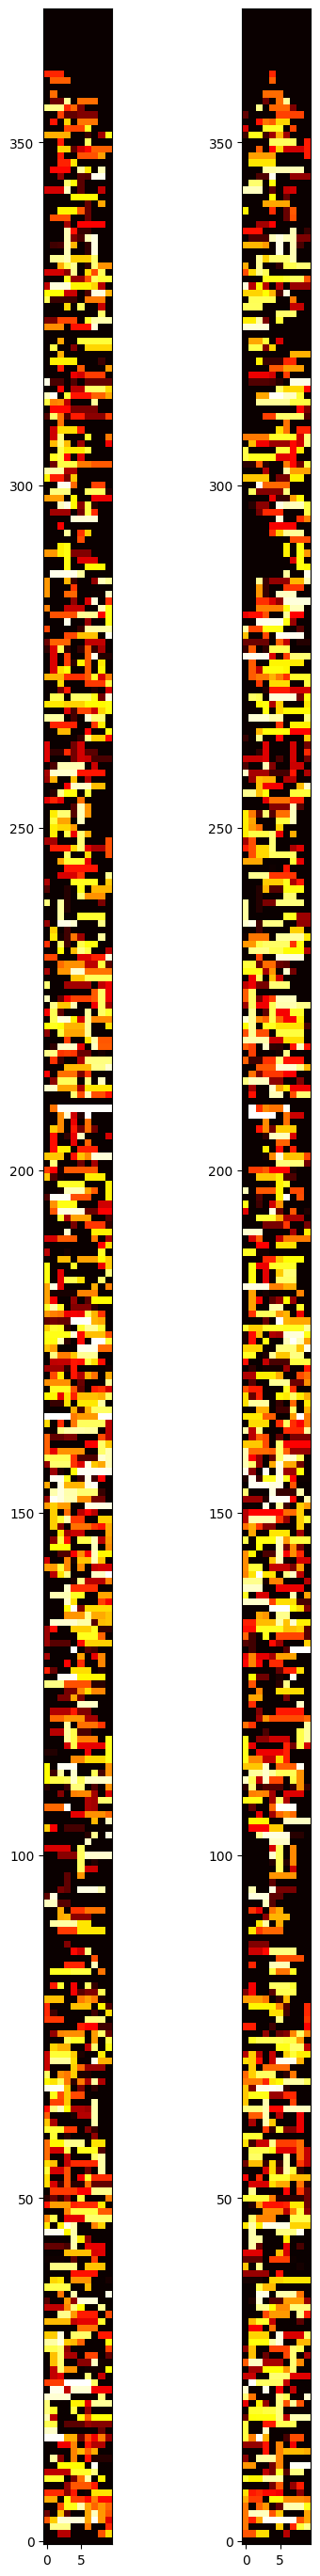

In [24]:
fig = plt.figure(figsize=(5,35))
draw_projections(space,(370,10))